In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix






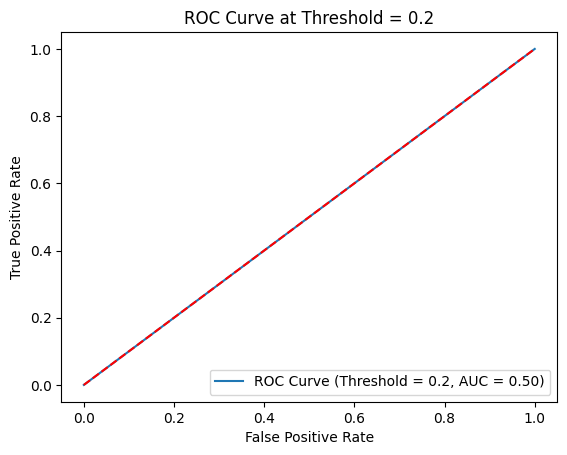

Threshold = 0.2:
Accuracy = 0.60, Recall = 1.00, Precision = 0.60, Specificity = 0.00


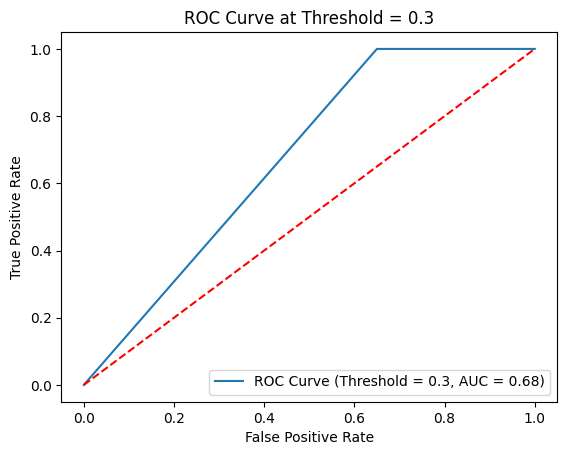

Threshold = 0.3:
Accuracy = 0.74, Recall = 1.00, Precision = 0.70, Specificity = 0.35


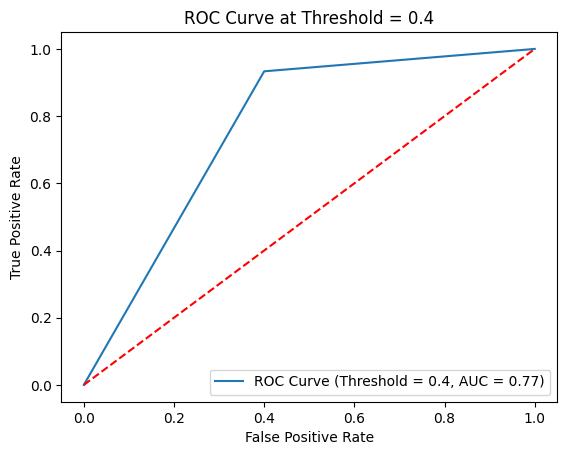

Threshold = 0.4:
Accuracy = 0.80, Recall = 0.93, Precision = 0.78, Specificity = 0.60


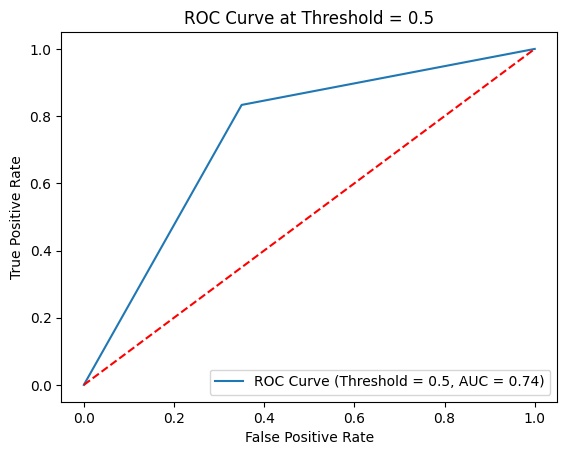

Threshold = 0.5:
Accuracy = 0.76, Recall = 0.83, Precision = 0.78, Specificity = 0.65


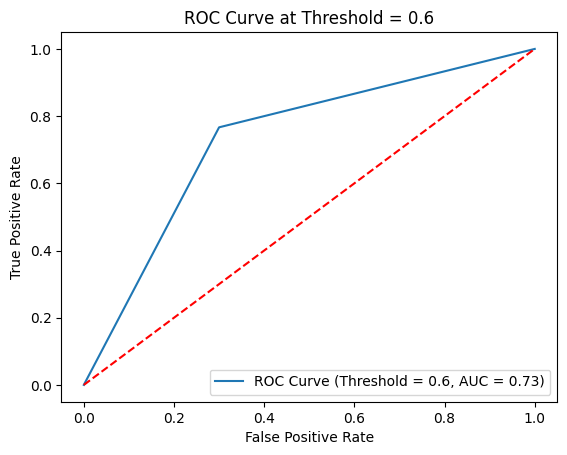

Threshold = 0.6:
Accuracy = 0.74, Recall = 0.77, Precision = 0.79, Specificity = 0.70


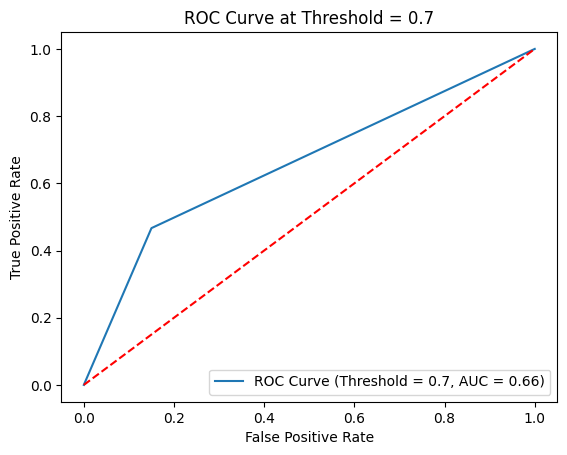

Threshold = 0.7:
Accuracy = 0.62, Recall = 0.47, Precision = 0.82, Specificity = 0.85


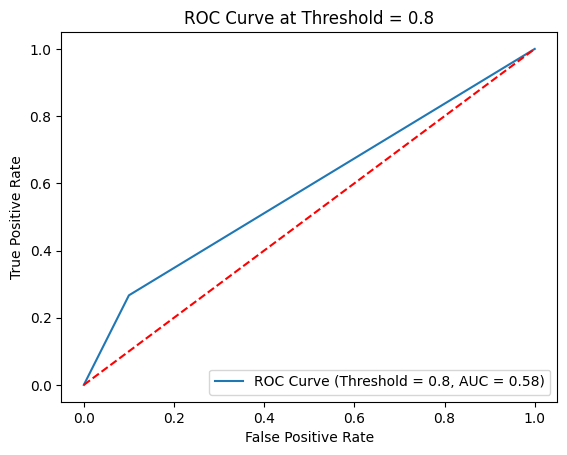

Threshold = 0.8:
Accuracy = 0.52, Recall = 0.27, Precision = 0.80, Specificity = 0.90


In [15]:

def evaluate_threshold(threshold, labels, predictions):
    
    #binary_predictions = [1 if p >= threshold else 0 for p in predictions]
   
    binary_predictions = []

    
    for p in predictions:
        
        if p >= threshold:
            
            binary_predictions.append(1)
        else:
            
            binary_predictions.append(0)

    
    tp, tn, fp, fn = 0, 0, 0, 0
    
   
    # for actual, predicted in zip(labels, binary_predictions):
    #     if actual == 1 and predicted == 1:
    #         tp += 1
    #     elif actual == 0 and predicted == 0:
    #         tn += 1
    #     elif actual == 1 and predicted == 0:
    #         fn += 1
    #     elif actual == 0 and predicted == 1:
    #         fp += 1

    for i in range(len(labels)):
        actual = labels[i]
        predicted = binary_predictions[i]

        # 对每一对实际值和预测值进行条件判断
        if actual == 1 and predicted == 1:
            tp += 1
        elif actual == 0 and predicted == 0:
            tn += 1
        elif actual == 1 and predicted == 0:
            fn += 1
        elif actual == 0 and predicted == 1:
            fp += 1
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

    
    return binary_predictions, accuracy, recall, precision, specificity



labels = np.array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
                   0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
                   0, 1, 1, 0, 1, 0, 1, 1, 0, 1])
predictions = np.array([0.7, 0.3, 0.3, 0.2, 0.9, 0.3, 0.6, 0.8, 0.2, 0.7,
                        0.9, 0.6, 0.4, 0.3, 0.8, 0.8, 0.6, 0.8, 0.2, 0.7,
                        0.6, 0.4, 0.5, 0.3, 0.4, 0.3, 0.6, 0.8, 0.2, 0.7,
                        0.5, 0.6, 0.7, 0.4, 0.6, 0.6, 0.6, 0.8, 0.2, 0.7,
                        0.6, 0.5, 0.6, 0.2, 0.8, 0.3, 0.6, 0.8, 0.2, 0.7])

thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

for threshold in thresholds:
    
    binary_predictions, accuracy, recall, precision, specificity = evaluate_threshold(threshold, labels, predictions)
    
    
    fpr, tpr, _ = roc_curve(labels, binary_predictions)
    auc = roc_auc_score(labels, binary_predictions)
    
    
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve (Threshold = {threshold}, AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve at Threshold = {threshold}')
    plt.legend(loc="lower right")
    plt.show()
    
    # 输出指标
    print(f"Threshold = {threshold}:")
    print(f"Accuracy = {accuracy:.2f}, Recall = {recall:.2f}, Precision = {precision:.2f}, Specificity = {specificity:.2f}")
